### Jason Paik
### jasonpaik9@gmail.com

## Thinkful Data Science Bootcamp
## Unit 1 Capstone - Narrative Analytics and Experimentation

#### Introduction

The World Happiness Report - a survey test introduced in 2012 and conducted by the United Nations - is a study that scores the happiness of citizens living in participating countries (roughly 150) based on six categories the UN believes correlates to one's day-to-day satisfaction with his or her's country: GDP, Family, Health/Life Expectancy, Freedom, Trust of Government, and Generosity. This happiness-driven mentality has trended itself in popular fashion in the global community and the World Happiness Report boasts itself to being an important benchmark in a country's own self-awareness of their own citizen's future outlook. In a better understanding of a country's self-progress towards being the best country it can be for their citizens, a country's diagnosis of its citizen's current well-being marks itself as being a measure of their own success and the World Happiness Report has lend itself prudently in this evaluation.

To delve deeper, can one actually quantifiably understand what leads to happiness? Can we actually "create" happiness if we were create a Utopian society? What would be the factors that go into this? But more importantly, what would be the highest priorities if we had to choose from these six categories the UN defined?


### Hypothesis: Does a greater GDP lead to a country's happiness?

The six variables the United Nations defined broadly identifies the main contributors citizens should focus their outlook of happiness against. To do a statistical overview of each variable's strength in its correlation to Happiness Score, I created a correlation table which identifies the strongest variables.

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches

In [3]:
#data = pd.read_csv('/Users/jasonpaik9/Documents/Thinkful/Fundamentals/Unit 4/HappinessData_2015-17.csv')
#data_yoy = pd.read_csv('/Users/jasonpaik9/Documents/Thinkful/Fundamentals/Unit 4/happinessdata_yoy_country.csv')
data = pd.read_csv('/Users/Jason Paik/Documents/Data Science/HappinessData_2015-17.csv')
data_yoy = pd.read_csv('/Users/Jason Paik/Documents/Data Science/happinessdata_yoy_country.csv')

In [22]:
data2017 = data[data['Year'].isin(['2017'])]
df_variable = pd.DataFrame(data2017)
corr = df_variable.drop(['Year','Country','Region','HappinessScore_woDystopia','Dystopia_Residual'],
                        axis=1).corr()
corr.style.background_gradient()

,HappinessScore,Economy_GDP,Family,Health_LifeExp,Freedom,Trust_GovtCorruption,Generosity
HappinessScore,1,0.812469,0.752737,0.781951,0.570137,0.155256,0.42908
Economy_GDP,0.812469,1,0.688296,0.843077,0.369873,-0.0190113,0.350944
Family,0.752737,0.688296,1,0.61208,0.424966,0.0516926,0.231841
Health_LifeExp,0.781951,0.843077,0.61208,1,0.349827,0.0631915,0.279752
Freedom,0.570137,0.369873,0.424966,0.349827,1,0.316083,0.499183
Trust_GovtCorruption,0.155256,-0.0190113,0.0516926,0.0631915,0.316083,1,0.294159
Generosity,0.42908,0.350944,0.231841,0.279752,0.499183,0.294159,1


Using the .corr() function, we are able to see that in the first row, Happiness Scores are best fluctuated by a country's Economy/GDP more than the other five variables, although Family and Health/Life Expectancy come close. For the purpose of the study, the experimental hypothesis we want to focus on is whether a country's GDP correlates directly to a citizen's happiness given they have the strongest correlation.


### Rollout Plan

Of the 150 countries that were surveyed, there are some important biases that will preface our rollout plan. As much as a Happiness Score might be "subjective" in one's interpretation, there are definitely other key factors that play into this type of questioning.

- We don't know the exactly the split between these countries and whether each were considered "developed" or "developing" countries. This is important because a "developed" country might have already have a thriving economy with the right jobs, infrastructure, and societal wealth that correlate to a Happiness Score so there may be intrinsic bias here to begin with.
- We don't know exactly the depth of questions that were asked in regards to Economy/GDP as the data only shows the survey scores themselves. Understanding whether those questions regarding the economy were impartial to a developed/developing demographic is critical to realizing the survey questions in the eyes of the surveyor and their own future outlook.
- We don't know the demographic of survey testers who took this survey. Were the people taking this survey an accurate representation of the country itself or were they just people who the UN best had access to via the Internet, major city connection, etc.? There's a bias here that is important to understood.

For instance, as we can see here, the bottom 10th and top 90th percentiles of Happiness Scores all come from different yet very similar regions of the world with extreme variations in GDP scores. This should show us that the geographic regions of a country has a large contributing factor towards its citizen's outlook on happiness:

In [23]:
## Top 90th percentile
data2017_90 = data2017[data2017.HappinessScore > data2017.HappinessScore.quantile(.90)]
data2017_90.head(10)

,Year,Country,Region,HappinessScore,HappinessScore_woDystopia,Economy_GDP,Family,Health_LifeExp,Freedom,Trust_GovtCorruption,Generosity,Dystopia_Residual
316,2017,New Zealand,Australia and New Zealand,7.314,5.267545,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
317,2017,Norway,Western Europe,7.537,5.260052,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
320,2017,Australia,Australia and New Zealand,7.284,5.218834,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
321,2017,Switzerland,Western Europe,7.494,5.217650,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
322,2017,Denmark,Western Europe,7.522,5.208127,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
323,2017,Ireland,Western Europe,6.977,5.203077,1.535707,1.558231,0.809783,0.573110,0.427858,0.298388,1.773869
324,2017,Sweden,Western Europe,7.284,5.186147,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
325,2017,Iceland,Western Europe,7.504,5.180989,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
326,2017,Canada,North America,7.316,5.129123,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
327,2017,Netherlands,Western Europe,7.377,5.082116,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804


In [24]:
## Bottom 10% percentile
data2017_10 = data2017[data2017.HappinessScore < data2017.HappinessScore.quantile(.10)]
data2017_10.head(10)

,Year,Country,Region,HappinessScore,HappinessScore_woDystopia,Economy_GDP,Family,Health_LifeExp,Freedom,Trust_GovtCorruption,Generosity,Dystopia_Residual
404,2017,Botswana,Sub-Saharan Africa,3.766,3.388533,1.122094,1.221555,0.341756,0.505196,0.099348,0.098583,0.377914
424,2017,Rwanda,Sub-Saharan Africa,3.471,2.930698,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
433,2017,Tanzania,Sub-Saharan Africa,3.349,2.727944,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
445,2017,Syria,Middle East and Northern Africa,3.462,2.400339,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
451,2017,Yemen,Middle East and Northern Africa,3.593,2.247503,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601
453,2017,Angola,Sub-Saharan Africa,3.795,2.180356,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
455,2017,Madagascar,Sub-Saharan Africa,3.644,2.059214,0.305809,0.913020,0.375223,0.189197,0.208733,0.067232,1.584613
459,2017,Guinea,Sub-Saharan Africa,3.507,1.954264,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312
460,2017,Haiti,Latin America and Caribbean,3.603,1.905827,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168
463,2017,Liberia,Sub-Saharan Africa,3.533,1.859457,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286


We can even see here that the happiness scores among all regions vary very differently over a three year period.

*I stripped the averages of each region's Happiness Score means and plotted them as such:*

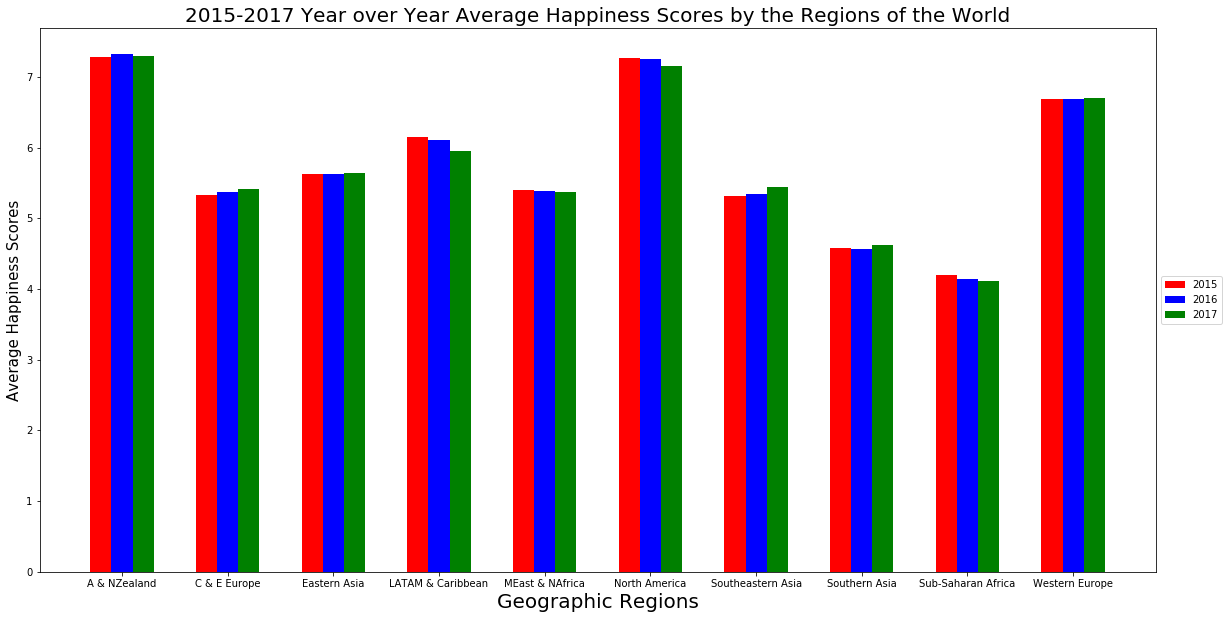

In [25]:
bar2015 = [7.285,5.3329,5.6262,6.1447,5.4069,7.273,5.3174,4.5809,4.2028,6.6896]
bar2016 = [7.3235,5.3707,5.6242,6.1018,5.3861,7.254,5.3389,4.5633,4.1364,6.6857]
bar2017 = [7.299,5.4099,5.6467,5.9578,5.3697,7.1545,5.4449,4.6284,4.1119,6.7037]
barWidth = 0.20
r1 = np.arange(len(bar2015))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.figure(figsize=(20,10))
plt.bar(r1,bar2015,color='red',width=barWidth,label='2015')
plt.bar(r2,bar2016,color='blue',width=barWidth,label='2016')
plt.bar(r3,bar2017,color='green',width=barWidth,label='2017')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([r + barWidth for r in range(len(bar2015))],
           ['A & NZealand','C & E Europe','Eastern Asia',
                              'LATAM & Caribbean','MEast & NAfrica','North America',
                              'Southeastern Asia','Southern Asia','Sub-Saharan Africa','Western Europe'])
plt.xlabel('Geographic Regions',size=20)
plt.ylabel('Average Happiness Scores',size=15)
plt.title('2015-2017 Year over Year Average Happiness Scores by the Regions of the World',size=20)
plt.show()

A rollout plan through A/B Testing is difficult to conduct partially due to the nature of not having control groups as a benchmark. Because survey scores are so subjective to the individual experience of his or her own country, a control group adequate unless you use the current survey scores as to what you compare your results to. However, a better approach is re-creating the survey with tailored questions over a series of time - my own roll-out plan would look as follows:

- Re-create survey questions that properly reflect each country's current economic situation. If a country is developed, survey questions should properly reflect their economic status in being a developed country and vice versa. For example, if a developed country is more progressive - i.e. Western Europe - questions about high tax rates or inflation may be more appropriate; developing countries may have questions more about employment opportunities or job outlook. Adjusting the survey against fairer playing fields will accurately reflect a country based on their circumstances.
- Surveying a demographic of people that best represents the geographic location of Region and the demographic of its people. The fairness of these survey scores fundamentally come down to the surveyors themselves and if the questions being asked unfairly represents the regions they are from, the economic state the country is in, or the socioeconomic class citizens are, these answers will have an unfair bias to them. A roll-out plan involving the questioning of all people of all socioeconomic classes will best tailor answers to fit this survey.
- After establishing the right demographic of people who fairly represent the country, repeating the same questions to same people over time would be worthwile in tracking. If we wanted to carefully understand Economy/GDP of a country, varying our survey with the demographics of different jobs and creating a job category - i.e. trade, office, health care, retail, etc. - and seeing their outlooks change would help create better insight as to how different professions express satisfaction and whether we can identify biases or not.

After developing a set of surveys that accurately reflect the demographic of the country and its economic infrastructure, the data of surveys will best be analyzed over a period of years. Doing a time series of the data gathered will, over time, show the trajectory of a citizen's outlook on their happiness and whether the country is doing enough to improve its own country. 

For example, with specific countries we see over a series of time how when the outlook of the country's economy improved their happiness improved accordingly - see within these regions how the country's happiness fluctuates when their GDP improves:

2015 = X

2016 = Triangle

2017 = Circle

In [6]:
bulgaria = data_yoy[data_yoy['Country'].isin(['Bulgaria'])]
latvia = data_yoy[data_yoy['Country'].isin(['Latvia'])]
romania = data_yoy[data_yoy['Country'].isin(['Romania'])]
philippines = data_yoy[data_yoy['Country'].isin(['Philippines'])]
cambodia = data_yoy[data_yoy['Country'].isin(['Cambodia'])]
malaysia = data_yoy[data_yoy['Country'].isin(['Malaysia'])]
venezuela = data_yoy[data_yoy['Country'].isin(['Venezuela'])]
haiti = data_yoy[data_yoy['Country'].isin(['Haiti'])]
mexico = data_yoy[data_yoy['Country'].isin(['Mexico'])]
liberia = data_yoy[data_yoy['Country'].isin(['Liberia'])]
zimbabwe = data_yoy[data_yoy['Country'].isin(['Zimbabwe'])]
zambia = data_yoy[data_yoy['Country'].isin(['Zambia'])]

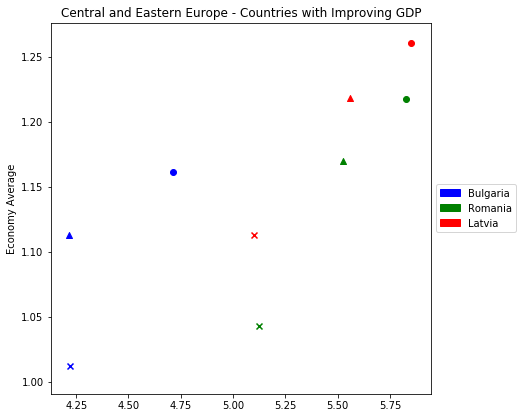

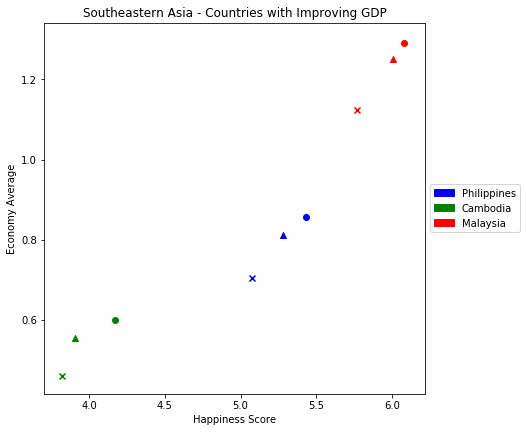

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.scatter(bulgaria.HappinessScore2015,bulgaria.EconomyAvg_2015,color='blue',marker="x")
plt.scatter(bulgaria.HappinessScore2016,bulgaria.EconomyAvg_2016,color='blue',marker="^")
plt.scatter(bulgaria.HappinessScore2017,bulgaria.EconomyAvg_2017,color='blue',marker="o")
plt.scatter(romania.HappinessScore2015,romania.EconomyAvg_2015,color='green',marker="x")
plt.scatter(romania.HappinessScore2016,romania.EconomyAvg_2016,color='green',marker="^")
plt.scatter(romania.HappinessScore2017,romania.EconomyAvg_2017,color='green',marker="o")
plt.scatter(latvia.HappinessScore2015,latvia.EconomyAvg_2015,color='red',marker="x")
plt.scatter(latvia.HappinessScore2016,latvia.EconomyAvg_2016,color='red',marker="^")
plt.scatter(latvia.HappinessScore2017,latvia.EconomyAvg_2017,color='red',marker="o")
plt.title('Central and Eastern Europe - Countries with Improving GDP')
#plt.xlabel('Happiness Score')
plt.ylabel('Economy Average')
blue_mark = mpatches.Patch(color='blue',label='Bulgaria')
green_mark = mpatches.Patch(color='green',label='Romania')
red_mark = mpatches.Patch(color='red',label='Latvia')
plt.legend(handles=[blue_mark,green_mark,red_mark],loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(15,15))
plt.subplot(2,2,2)
plt.scatter(philippines.HappinessScore2015,philippines.EconomyAvg_2015,color='blue',marker="x")
plt.scatter(philippines.HappinessScore2016,philippines.EconomyAvg_2016,color='blue',marker="^")
plt.scatter(philippines.HappinessScore2017,philippines.EconomyAvg_2017,color='blue',marker="o")
plt.scatter(cambodia.HappinessScore2015,cambodia.EconomyAvg_2015,color='green',marker="x")
plt.scatter(cambodia.HappinessScore2016,cambodia.EconomyAvg_2016,color='green',marker="^")
plt.scatter(cambodia.HappinessScore2017,cambodia.EconomyAvg_2017,color='green',marker="o")
plt.scatter(malaysia.HappinessScore2015,malaysia.EconomyAvg_2015,color='red',marker="x")
plt.scatter(malaysia.HappinessScore2016,malaysia.EconomyAvg_2016,color='red',marker="^")
plt.scatter(malaysia.HappinessScore2017,malaysia.EconomyAvg_2017,color='red',marker="o")
plt.title('Southeastern Asia - Countries with Improving GDP')
plt.xlabel('Happiness Score')
plt.ylabel('Economy Average')
blue_mark = mpatches.Patch(color='blue',label='Philippines')
green_mark = mpatches.Patch(color='green',label='Cambodia')
red_mark = mpatches.Patch(color='red',label='Malaysia')
plt.legend(handles=[blue_mark,green_mark,red_mark],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Understand the depth of this and why countries like these six above improved so drastically over three years would give tell-tale information as to why Economy/GDP was so important to their happiness - what was it about these countries and their economies that led them to such contentment? Was it job-growth? Was it more opportunities? Was it more wealth or wage increases? Examining this would better help shape our roll-out plan in fleshing out our hypothesis.

### Evaluation Plan of Success

An interesting wrinkle we see in the dataset is how above-average Happiness Scores is achieved even with below-average Economy/GDP scores. This might be relevant to all of the other six categories but this shows that even despite underwhelming Economy/GDP scores, an above-average Happiness Score can be achieved. This may be a contradiction to understanding our evaluation of success and an example can be shown as such - these are the following countries that have below-average GDP scores in 2017 but acheived above average Happiness Scores:


In [28]:
data2017.loc[(data2017.Economy_GDP < data2017['Economy_GDP'].mean())
            & (data.HappinessScore > data2017['HappinessScore'].mean())]

,Year,Country,Region,HappinessScore,HappinessScore_woDystopia,Economy_GDP,Family,Health_LifeExp,Freedom,Trust_GovtCorruption,Generosity,Dystopia_Residual
353,2017,Uzbekistan,Central and Eastern Europe,5.971,4.154443,0.786441,1.548969,0.498273,0.658249,0.415984,0.246528,1.816914
375,2017,Paraguay,Latin America and Caribbean,5.493,3.807797,0.932537,1.507285,0.579251,0.473508,0.224151,0.091066,1.685333
388,2017,Guatemala,Latin America and Caribbean,6.454,3.559849,0.872002,1.255585,0.540240,0.531311,0.283488,0.077223,2.893891
389,2017,Nicaragua,Latin America and Caribbean,6.071,3.557525,0.737299,1.287216,0.653096,0.447552,0.301674,0.130688,2.513931
400,2017,Philippines,Southeastern Asia,5.430,3.457686,0.857699,1.253918,0.468009,0.585215,0.193513,0.099332,1.972605
405,2017,Bolivia,Latin America and Caribbean,5.823,3.379777,0.833757,1.227619,0.473630,0.558733,0.225561,0.060478,2.443279
406,2017,Belize,Latin America and Caribbean,5.956,3.323691,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2.631956
410,2017,El Salvador,Latin America and Caribbean,6.003,3.288620,0.909784,1.182125,0.596019,0.432453,0.078258,0.089981,2.714594
423,2017,Moldova,Central and Eastern Europe,5.838,3.029761,0.728871,1.251826,0.589465,0.240729,0.208779,0.010091,2.807808


What is interesting to understand from this data above is that most of the regions are isolated to a few specific regions that find happiness in other things rather than Economy/GDP. Quite possibly there are other contributing factors than raising money that are important to one's happiness.

But to figure out whether GDP has the biggest influence on it or not would have to be measured against other categorical variables and the demographics to which we survey, per the above roll-out plan. For instance, if we included inflation rates and its correlation to a surveyor's outlook on Economy/GDP, could we create more data that would support as to why exactly a certain GDP correlates to a happiness? If we could create more data on not just the satisfaction with the local economy but possibly dissatisfaction of their economy - i.e. Venezuela and their catastrophic inflation rates - we can better understand how much their happiness scores fluctuate.

The greatest evaluator of success would be creating benchmark Happiness Scores for the regions each country resides from and ultimately stacking their success against similar countries. Comparing extremely happy countries like New Zealand (the happiest country in 2017) to Liberia (to most discontent country in 2017) is an unfair comparison if their Happiness Scores are intrinsically biased. Concluding a country's success based of these benchmarks by developed/developing countries and the regions they are from would better evaluate success for this hypothesis. We are able to then evaluate whether GDP does have a pull on Happiness Scores relative to the country a citizens resides in.